In [1]:
from tock import *

# Turing machines

Turing machines (TMs) have a finite state and an input, but the input is now a tape that the machine can move in either direction on and also write on. By default, TMs are deterministic. Although Sipser never actually writes the transition function of a TM as a table, it's a perfectly reasonable thing to do. However, we use a different notation for moves. The machine in Example 3.7 would be:

In [2]:
m = read_csv("examples/sipser-3-7.csv")
m.is_pushdown(), m.is_deterministic()

(False, True)

In [3]:
to_table(m)

,0,_,x
>q1,"q2,_ ^","qreject,_ ^","qreject,x ^"
q2,"q3,x ^","qaccept,_ ^","q2,x ^"
q3,"q4,0 ^","q5,^ _","q3,x ^"
q4,"q3,x ^","qreject,_ ^","q4,x ^"
q5,"q5,^ 0","q2,_ ^","q5,^ x"
@qaccept,,,


As always, the first column lists the possible states, and the start state is marked with a `>` and the accept state is marked with a `@`.

The first row lists possible tape symbols. Use `_` for the blank symbol.

In the cells, Sipser uses `L` and `R` for moving left and right. We use a different notation: use `^` to indicate the head position. For example, if the machine is in state `q1` and the current tape symbol is `0`, then the machine changes to state `q2`, erases (writes `_`), and moves to the right. If the machine is in state `q5` and the current tape symbol is `0`, then the machine rewrites the `0` and moves left.

In the second example (state `q5` and symbol `0`), Sipser would have allowed you to write just `R` for "don't write anything and move right". We don't allow this shorthand (sorry). Instead, you have to rewrite the same symbol that was read.

Here's the state transition diagram, which might or might not be more intuitive:

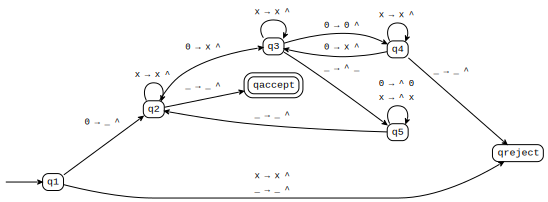

In [4]:
to_graph(m)

Sipser allows a shorthand in which there are multiple symbols to the left of the arrow. For example, the transitions from `q5` to itself could be written `0,x -> L` for "if the current symbol is either `0` or `x`, move left". We don't allow this; instead, use two transitions.

This machine recognizes the language $\{\texttt{0}^{2^n} \mid n \geq 0\}$. Here's an example run:

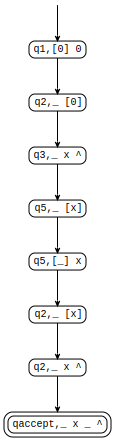

In [5]:
run(m, "0 0")

Each node shows both the state and the tape, with the head position indicated using square brackets. This run ended in the accept state (drawn as a double node), so the machine accepted the string.

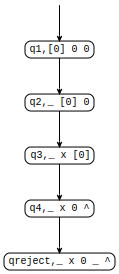

In [6]:
run(m, "0 0 0")

This run ended in the reject state, so the machine rejected the string.

It's possible, of course, for a run of a Turing machine to go on forever, so the `run` function will give up after a certain number of steps. You can control that limit using the `steps` option:

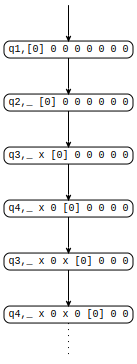

In [7]:
run(m, "0 0 0 0 0 0 0 0", steps=5)

The dotted edge indicates that the run continues but is not shown. Be careful -- in this case you don't know whether the machine would eventually accept the string.